In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# changing the datatypes of Invoice = string, Customer ID = string, InvoiceDate = datetime
# Invoice and Customer ID are the key/ID for our dataset

df = pd.read_csv(r"C:\Users\admin\Desktop\refocus\Module 5\5.7 data set\online_retail.csv", parse_dates=['InvoiceDate'],
                dtype ={'Invoice':str,
                        'Customer ID':str
                })
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom


In [3]:
print('these are ',len(df),' transactions in our datasets')
df.count()

these are  525461  transactions in our datasets


Invoice        525461
StockCode      525461
Description    522533
Quantity       525461
InvoiceDate    525461
Price          525461
Customer ID    417534
Country        525461
dtype: int64

    # Starting of Data Cleaning By Removing the Cancelled transactions and Null Values

In [4]:
# we have Cancelled transactions that started with letter 'C' in Invoice Column
df.Invoice.str.startswith('C')

0         False
1         False
2         False
3         False
4         False
          ...  
525456    False
525457    False
525458    False
525459    False
525460    False
Name: Invoice, Length: 525461, dtype: bool

In [5]:
# using ~ to change the false into True
~df.Invoice.str.startswith('C')

0         True
1         True
2         True
3         True
4         True
          ... 
525456    True
525457    True
525458    True
525459    True
525460    True
Name: Invoice, Length: 525461, dtype: bool

In [6]:
df.Invoice.str.startswith('C').sum()

10206

In [7]:
# removing now the Cancelled Transactions
df=df[~df.Invoice.str.startswith('C')]
df.count()

Invoice        515255
StockCode      515255
Description    512327
Quantity       515255
InvoiceDate    515255
Price          515255
Customer ID    407695
Country        515255
dtype: int64

In [8]:
# we get the sum of null values in Customer ID
df['Customer ID'].isna().sum()

107560

In [9]:
# drop of null values in Customer ID
df = df.dropna(subset=['Customer ID'])
df.count()

Invoice        407695
StockCode      407695
Description    407695
Quantity       407695
InvoiceDate    407695
Price          407695
Customer ID    407695
Country        407695
dtype: int64

In [10]:
 # Checking the descriptive statistics
df[['Quantity','Price']].describe()

,Quantity,Price
count,407695.000000,407695.000000
mean,13.586686,3.294188
std,96.842229,34.756655
min,1.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,19152.000000,10953.500000


Using the describe function above, we see some descriptive statistics for our variables. Notice that there are also large max quantities and price compared to their 75th percentiles. We can also choose to remove them, but since we have mostly wholesale customers, there is a good chance that these quantities are correct.

In [11]:
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom


In [12]:
df[df.Quantity == df.Quantity.max()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.1,13902,Denmark


In [13]:
df[df.Price == df.Price.max()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.5,12918,United Kingdom


The transaction with a very large quantity is a mug with a price of 0.1. This seems plausible and we can choose to retain this. Similarly, the transaction with the very large price was manually generated (based on the description) and is only 1 quantity. We can also retain this.

datasets are already cleaned by removing nulls and Cancelled transactions if there is an outliers (eg. Quantity & Price should not be negative.
We can now proceed with our main objective which is to provide Cohort Analysis and Explenatory Analysis

1. Count of Invoice and Customers
2. Number of Transactions per Customer
3. Monthly number of transactions

### Count of Invoice and Customers

In [14]:
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom


In [15]:
df.Invoice.nunique()

19215

In [16]:
df['Customer ID'].nunique()

4314

We see that we have 19,215 unique transactions across 4,314 customers. This means that each invoice may have multiple stock codes (items).

### Number of Transactions per Customer

In [17]:
# group by Customer ID
# it may be possible to have multiple stock codes in a single invoice
# so we only count the unique Invoice.
df_customer = df.groupby('Customer ID')['Invoice'].nunique()
df_customer.head()

Customer ID
12346    11
12347     2
12348     1
12349     3
12351     1
Name: Invoice, dtype: int64

### Monthly number of customers (loyal customers)

Text(0.5, 0, 'Number of Transactions')

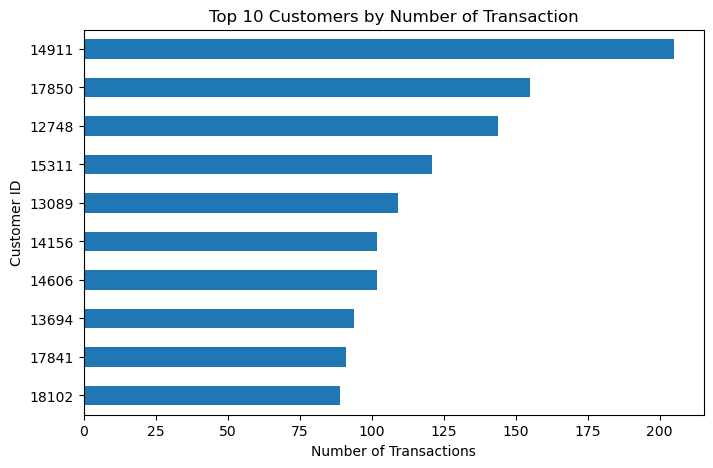

In [18]:
fig, ax = plt.subplots(figsize=(8,5))
df_customer.sort_values(ascending = True).tail(10).plot(kind='barh', ax=ax)
ax.set_title('Top 10 Customers by Number of Transaction')
ax.set_xlabel('Number of Transactions')

From the plot above, we see that our top 10 customers have at least 80 transactions over the range of our dataset (01/12/2009 to 09/12/2011). Our top customer has more than 200 transactions!

### Distribution of our customer transactions

Text(0, 0.5, 'Count of Customers')

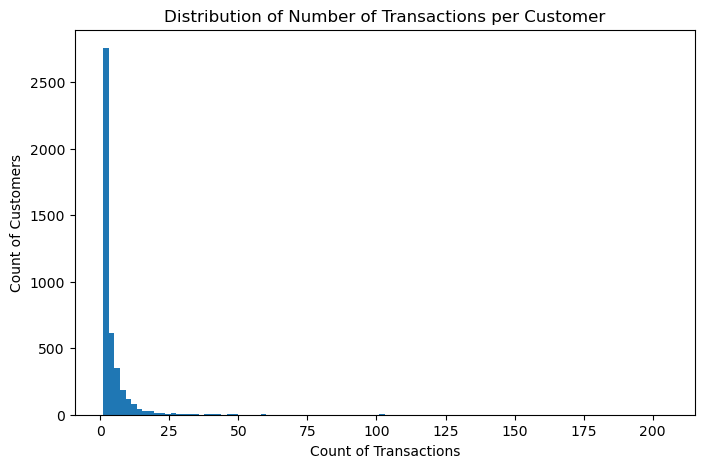

In [19]:
fig, ax = plt.subplots(figsize=(8,5))
df_customer.plot(kind='hist', ax=ax, bins=100)
ax.set_title('Distribution of Number of Transactions per Customer')
ax.set_xlabel('Count of Transactions')
ax.set_ylabel('Count of Customers')

The histogram shows the distribution of our customer transactions. The leftmost bars indicate that we have a large number of customers (>2,500) with only a few transactions (least loyal). We also see some smaller bars in the right tail which tells us that we have a small number of customers with a large number of transactions (most loyal).

### Monthly number of transactions

In [20]:
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom


In [21]:
df['Year'] = df.InvoiceDate.dt.year
df['Month'] = df.InvoiceDate.dt.month

In [22]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009,12


In [23]:
df_monthly = df.groupby(['Year','Month'])['Invoice'].nunique()
df_monthly

Year  Month
2009  12       1512
2010  1        1011
      2        1106
      3        1524
      4        1329
      5        1377
      6        1497
      7        1381
      8        1293
      9        1689
      10       2133
      11       2587
      12        776
Name: Invoice, dtype: int64

Text(0.5, 0, 'Month')

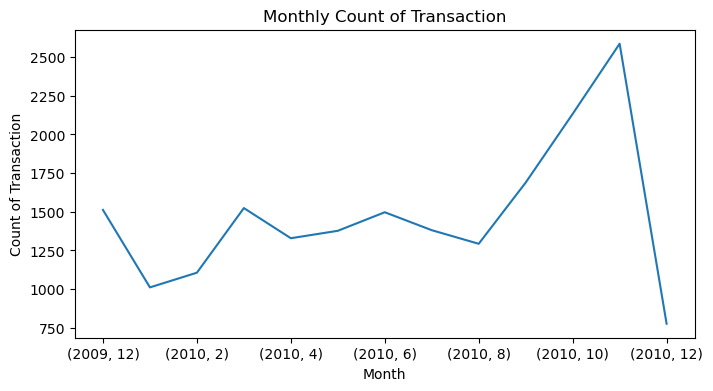

In [24]:
fig, ax = plt.subplots(figsize=(8,4))
df_monthly.plot(ax=ax)
ax.set_title('Monthly Count of Transaction')
ax.set_ylabel('Count of Transaction')
ax.set_xlabel('Month')

We see a couple of interesting findings here.

1. Eventhough the data description states that the transactions ranges from 01/12/2009 to 09/12/2011, we see that we only have transactions up to December 2010. In this case, will continue our analysis with just the 1-year worth of transaction.

2. There is an overall increase in transactions (possible more revenue as well) from the past year. It also shows that transactions peaks towards the end of the year, possibly due to more customers purchasing christmas presents.

# COHORT ANALYSIS

After doing a quick data exploration with our data, we can now proceed with the Cohort Analysis.

In this case, we want to get insights based on user retention. To do this, we set the customer cohorts based on the month of their first transactions we then track their purchases throughout the year.

We first select only the relevant columns and drop duplicates (since it is possible to have multiple stock codes per invoice)

In [25]:
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12


In [26]:
df_cohorts = df[['Customer ID','Invoice','InvoiceDate']].drop_duplicates()

In [27]:
df_cohorts.head()

,Customer ID,Invoice,InvoiceDate
0,13085,489434,2009-12-01 07:45:00
8,13085,489435,2009-12-01 07:46:00
12,13078,489436,2009-12-01 09:06:00
31,15362,489437,2009-12-01 09:08:00
54,18102,489438,2009-12-01 09:24:00


In [28]:
df_cohorts.count()

Customer ID    19250
Invoice        19250
InvoiceDate    19250
dtype: int64

Next, we create a cohort column based on the first transaction of each customer.

In [29]:
df_first_txn = df_cohorts.groupby('Customer ID')['InvoiceDate'].min().dt.to_period('M')
df_first_txn.name = 'cohort'
df_first_txn = df_first_txn.reset_index()
df_first_txn.head(10)

,Customer ID,cohort
0,12346,2009-12
1,12347,2010-10
2,12348,2010-09
3,12349,2010-04
4,12351,2010-11
5,12352,2010-11
6,12353,2010-10
7,12355,2010-05
8,12356,2010-10
9,12357,2010-11


    Merging the created dataframe with original dataframe

In [30]:
df_first_txn.head(1)

,Customer ID,cohort
0,12346,2009-12


In [31]:
df_cohorts.head(1)

,Customer ID,Invoice,InvoiceDate
0,13085,489434,2009-12-01 07:45:00


In [32]:
df_cohorts = df_cohorts.merge(df_first_txn, how='left', on=['Customer ID'])
df_cohorts.tail(10)

,Customer ID,Invoice,InvoiceDate,cohort
19240,15555,538156,2010-12-09 16:53:00,2009-12
19241,17576,538157,2010-12-09 16:57:00,2009-12
19242,17841,538163,2010-12-09 17:27:00,2009-12
19243,14031,538165,2010-12-09 17:34:00,2009-12
19244,17965,538166,2010-12-09 18:09:00,2009-12
19245,14713,538167,2010-12-09 18:58:00,2009-12
19246,14702,538168,2010-12-09 19:23:00,2009-12
19247,13230,538169,2010-12-09 19:28:00,2010-03
19248,13969,538170,2010-12-09 19:32:00,2010-03
19249,17530,538171,2010-12-09 20:01:00,2009-12


In the sample table above, we see that even if the InvoiceDate is on December 2010, some customers have their first transaction as far back as on December 2009.

Next, we convert the InvoiceDate column to a year-month variable (txn_month)

In [33]:
df_cohorts['txn_month'] = df_cohorts['InvoiceDate'].dt.to_period('M')
df_cohorts.head(5)

,Customer ID,Invoice,InvoiceDate,cohort,txn_month
0,13085,489434,2009-12-01 07:45:00,2009-12,2009-12
1,13085,489435,2009-12-01 07:46:00,2009-12,2009-12
2,13078,489436,2009-12-01 09:06:00,2009-12,2009-12
3,15362,489437,2009-12-01 09:08:00,2009-12,2009-12
4,18102,489438,2009-12-01 09:24:00,2009-12,2009-12


We now have a cohort column corresponding to the year-month of a customers' first transaction and a txn_month column corresponding to the actual year-month of the transaction.

We can now view our cohorts. We group the table by cohort and txn_month and get the counts of unique customer for each cohort.

In [34]:
df_cohorts = df_cohorts.groupby(['cohort','txn_month'])['Customer ID'].nunique()
df_cohorts.name = 'num_customers'
df_cohorts = df_cohorts.reset_index()
df_cohorts.head(10)

,cohort,txn_month,num_customers
0,2009-12,2009-12,955
1,2009-12,2010-01,337
2,2009-12,2010-02,319
3,2009-12,2010-03,406
4,2009-12,2010-04,363
5,2009-12,2010-05,343
6,2009-12,2010-06,360
7,2009-12,2010-07,327
8,2009-12,2010-08,321
9,2009-12,2010-09,346


The resulting table shows the number of customers who had their first purchase in their cohorts and the customers for each succeeding month. For example, their are 346 customers who had their first purchase on December 2009 but they also had a transaction on September 2010.

Let's add a period number column which corresponds to the number of months since their first purchase

In [35]:
# subtract cohort from txn_month, this will result in a MonthEnd pandas datatype
# to get the value as integer, we use the pandas apply function
df_cohorts['period_number'] = (df_cohorts.txn_month - df_cohorts.cohort).apply(lambda x : x.n)
df_cohorts.head(10)

,cohort,txn_month,num_customers,period_number
0,2009-12,2009-12,955,0
1,2009-12,2010-01,337,1
2,2009-12,2010-02,319,2
3,2009-12,2010-03,406,3
4,2009-12,2010-04,363,4
5,2009-12,2010-05,343,5
6,2009-12,2010-06,360,6
7,2009-12,2010-07,327,7
8,2009-12,2010-08,321,8
9,2009-12,2010-09,346,9


Next, we pivot our table to get our cohorts as the index and the period number as the columns. This makes the data easier to visualize and interpret.

In [36]:
df_pivot = df_cohorts.pivot_table(index ='cohort' , columns ='period_number', values ='num_customers')
df_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2009-12,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,403.0,473.0,237.0
2010-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,116.0,38.0,NaN
2010-02,376.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,27.0,NaN,NaN
2010-03,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,35.0,NaN,NaN,NaN
2010-04,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,20.0,NaN,NaN,NaN,NaN
2010-05,254.0,40.0,43.0,44.0,45.0,65.0,54.0,20.0,NaN,NaN,NaN,NaN,NaN
2010-06,270.0,47.0,51.0,55.0,62.0,77.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,186.0,29.0,34.0,55.0,54.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,162.0,33.0,48.0,52.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lastly, we can convert the counts to percentages (% retention) by dividing the values of each row by the the original cohort size (period=0)

In [37]:
# get the original cohort size
# df_orig_cohorts = df_pivot[0]
# df_orig_cohorts
df_orig_cohorts = df_pivot[0]
df_orig_cohorts

cohort
2009-12    955.0
2010-01    383.0
2010-02    376.0
2010-03    443.0
2010-04    294.0
2010-05    254.0
2010-06    270.0
2010-07    186.0
2010-08    162.0
2010-09    243.0
2010-10    377.0
2010-11    325.0
2010-12     46.0
Freq: M, Name: 0, dtype: float64

In [38]:
# divide by original cohort size
df_pivot = df_pivot.divide(df_orig_cohorts, axis =0)
df_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2009-12,1.0,0.352880,0.334031,0.425131,0.380105,0.359162,0.376963,0.342408,0.336126,0.362304,0.421990,0.495288,0.248168
2010-01,1.0,0.206266,0.310705,0.305483,0.263708,0.300261,0.258486,0.229765,0.279373,0.318538,0.302872,0.099217,NaN
2010-02,1.0,0.236702,0.223404,0.289894,0.244681,0.199468,0.191489,0.284574,0.252660,0.273936,0.071809,NaN,NaN
2010-03,1.0,0.189616,0.230248,0.241535,0.232506,0.203160,0.246050,0.302483,0.275395,0.079007,NaN,NaN,NaN
2010-04,1.0,0.193878,0.193878,0.163265,0.183673,0.224490,0.275510,0.261905,0.068027,NaN,NaN,NaN,NaN
2010-05,1.0,0.157480,0.169291,0.173228,0.177165,0.255906,0.212598,0.078740,NaN,NaN,NaN,NaN,NaN
2010-06,1.0,0.174074,0.188889,0.203704,0.229630,0.285185,0.066667,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.155914,0.182796,0.295699,0.290323,0.102151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.203704,0.296296,0.320988,0.117284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We now have our retention matrix. The row index shows the cohort membership and the columns represent the number of months since their first transaction.

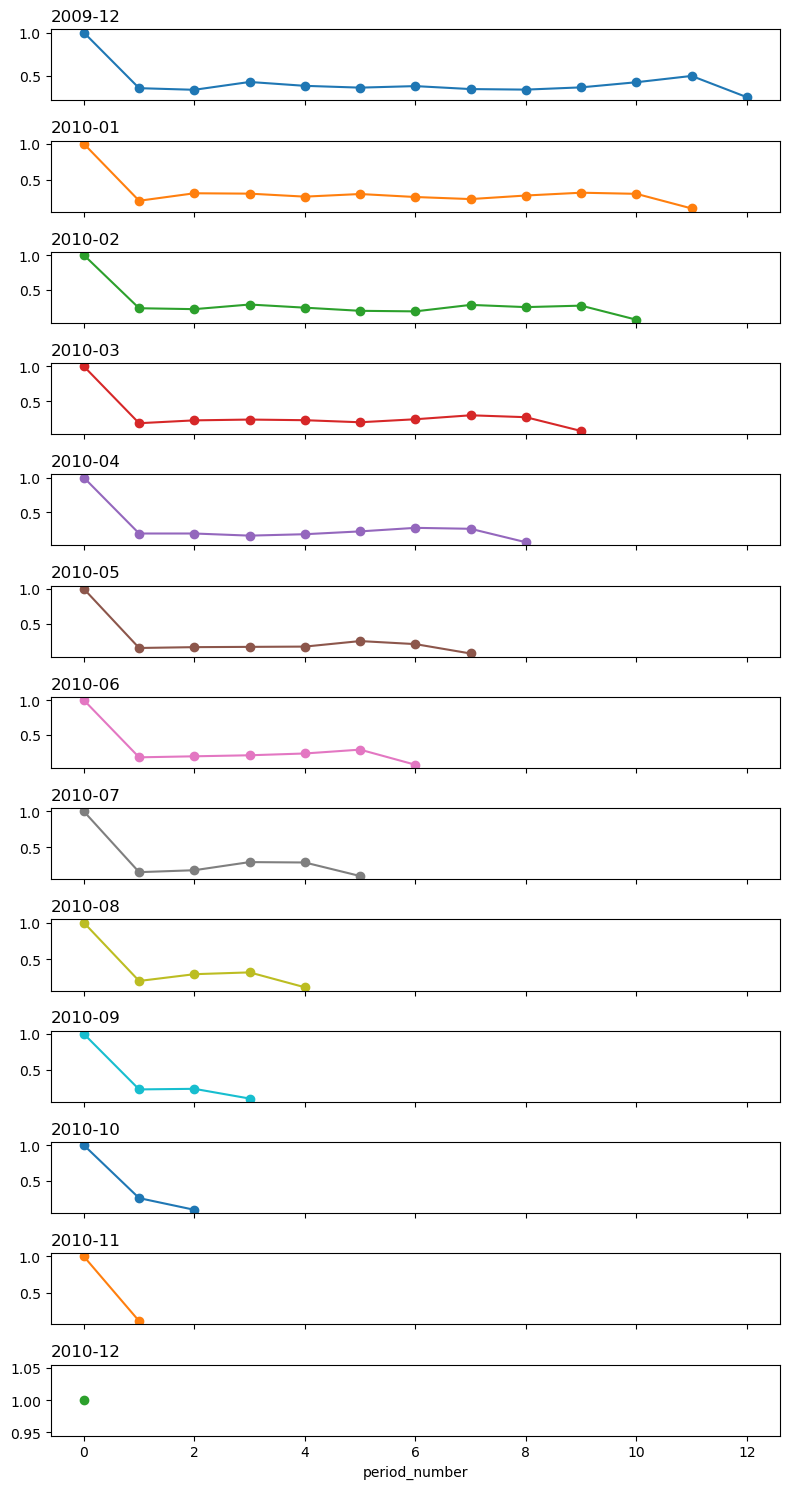

In [39]:
# plot all cohorts in a line
fig, ax = plt.subplots(13, 1, figsize=(8, 15), sharex=True)

df_pivot.T.plot(ax=ax, subplots=True, legend=False, marker='o');

for i, cohort in enumerate(df_pivot.index):
    ax[i].set_title(cohort, loc='left')

fig.tight_layout()


In [40]:
import matplotlib
import numpy as np

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for _, spine in ax.spines.items():
      spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

<__array_function__ internals>:200: UserWarning: Warning: converting a masked element to nan.
C:\Users\admin\anaconda3\Lib\site-packages\matplotlib\colors.py:1311: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
C:\Users\admin\anaconda3\Lib\site-packages\matplotlib\ticker.py:374: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  return self.fmt.format(x=x, pos=pos)


Text(0.5, 0, 'Period')

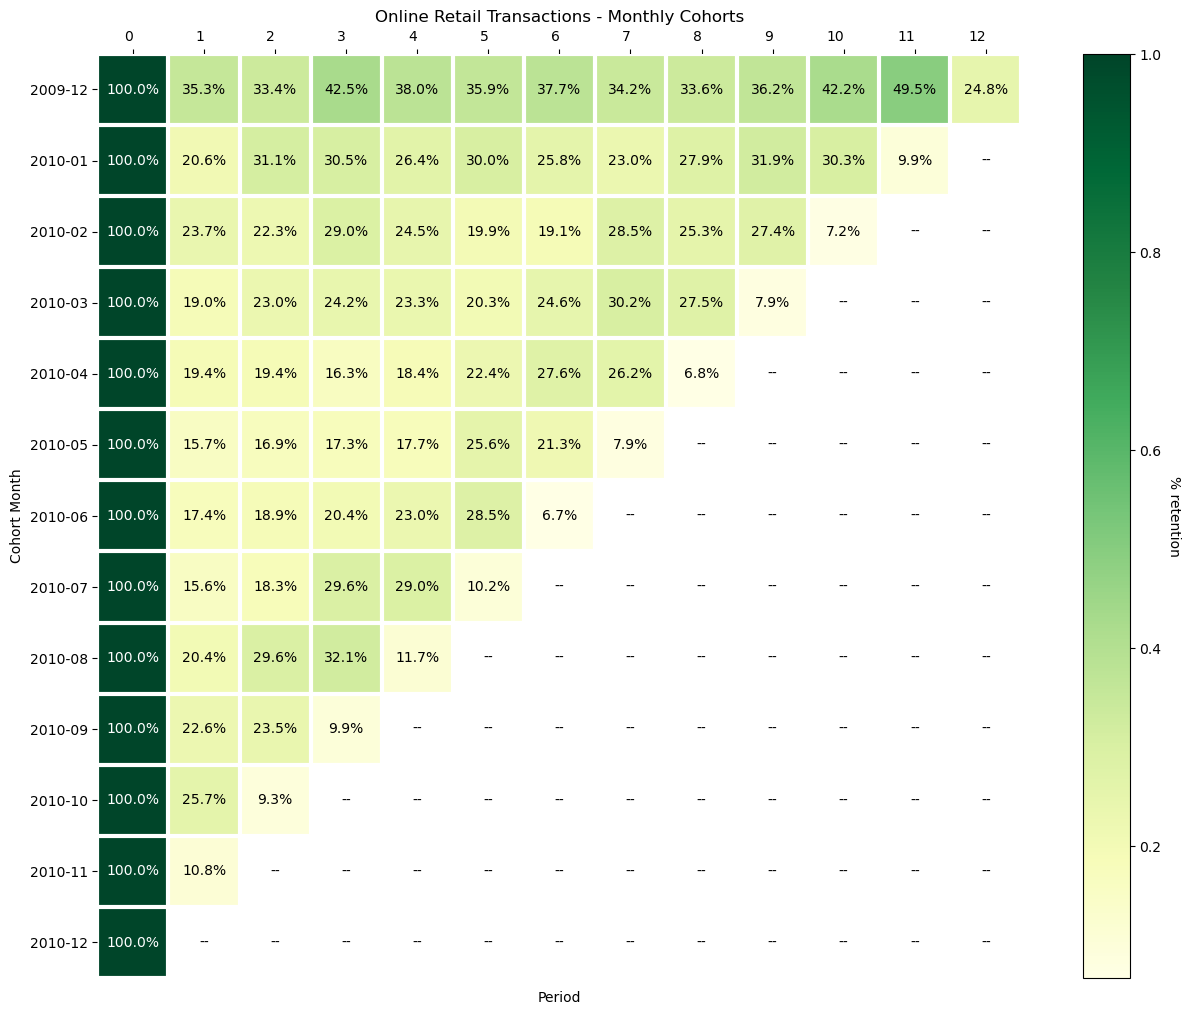

In [41]:
fig, ax = plt.subplots(figsize=(16,12))

im, cbar = heatmap(df_pivot.values, df_pivot.index, df_pivot.columns, ax=ax,
                   cmap="YlGn", cbarlabel="% retention")
texts = annotate_heatmap(im, valfmt="{x:.1%}")

ax.set_title('Online Retail Transactions - Monthly Cohorts')
ax.set_ylabel('Cohort Month')
ax.set_xlabel('Period')

# RFM ANALYSIS

Revenue per Customer
To get the total revenue per customer, we need to add a total amount column (quantity x unit price). We can then change our aggregate function to its' sum instead of the count of unique transactions.

In [42]:
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12


In [43]:
# create a total_amount column
df['total_amount'] = (df.Quantity * df.Price)
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,total_amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009,12,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12,81.0


## Revenue per Customers

In [44]:
# group by Customer ID
# get the sum of total_amount
df_customers = df.groupby('Customer ID')['total_amount'].sum()
df_customers.head(2)

Customer ID
12346     372.86
12347    1323.32
Name: total_amount, dtype: float64

Text(0.5, 0, 'Total Amount Spent')

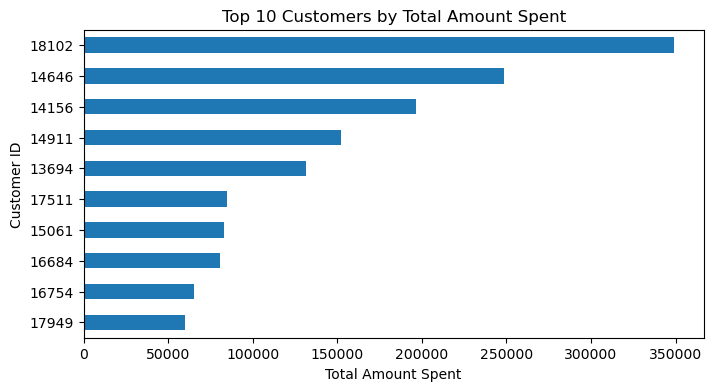

In [45]:
# top spenders
fig, ax = plt.subplots(figsize=(8, 4))
df_customers.sort_values(ascending=True).tail(10).plot(kind='barh', ax=ax)
ax.set_title('Top 10 Customers by Total Amount Spent')
ax.set_xlabel('Total Amount Spent')

Notice that our top spenders are not necessarily the most loyal (customer 18102 is the top spender but only top 10 with the most number of transactions). There is also a large gap between the amount spent - could be because most customers are wholesalers.

Text(0, 0.5, 'Count of Customers')

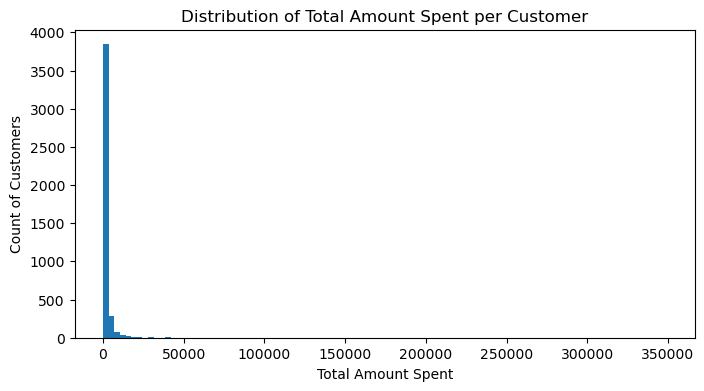

In [46]:
# distribution of customer spending
fig, ax = plt.subplots(figsize=(8, 4))
df_customers.plot(kind='hist', ax=ax, bins=100)
ax.set_title('Distribution of Total Amount Spent per Customer')
ax.set_xlabel('Total Amount Spent')
ax.set_ylabel('Count of Customers')

Notice that our top spenders are not necessarily the most loyal (customer 18102 is the top spender but only top 10 with the most number of transactions). There is also a large gap between the amount spent - could be because most customers are wholesalers.

## Monthly Revenue

In [47]:
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,total_amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009,12,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12,81.0


In [48]:
df_monthly = df.groupby(['Month','Year'])['total_amount'].sum()
df_monthly

Month  Year
1      2010     557319.062
2      2010     506371.066
3      2010     699608.991
4      2010     594609.192
5      2010     599985.790
6      2010     639066.580
7      2010     591636.740
8      2010     604242.650
9      2010     831615.001
10     2010    1036680.000
11     2010    1172336.042
12     2009     686654.160
       2010     311878.000
Name: total_amount, dtype: float64

Text(0, 0.5, 'Total Amount')

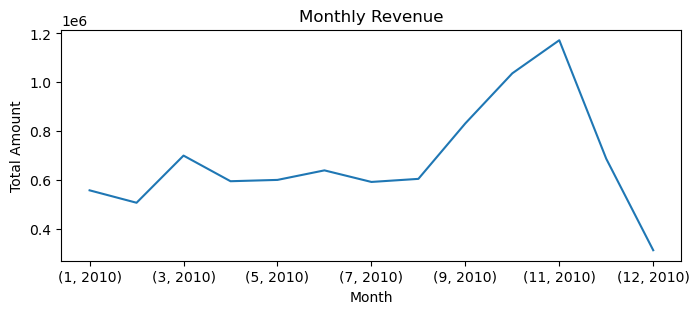

In [50]:
fig, ax = plt.subplots(figsize=(8,3))
df_monthly.plot(ax=ax)
ax.set_title('Monthly Revenue')
ax.set_xlabel('Month')
ax.set_ylabel('Total Amount')

We can now proceed with the RFM Analysis.

In this case, we need to set a "current date" for our recency calculations. Let's assume that our current date is 1 day after the latest in our dataset. In actual application, we can use the actual current date as long as the dataset is also updated.

In [51]:
# use datetime.timedelta(days=1) to add +1 day after latest invoice date
import datetime

latest_invoice_date = df.InvoiceDate.max()
current_date = latest_invoice_date + datetime.timedelta(days=1)
latest_invoice_date, current_date

(Timestamp('2010-12-09 20:01:00'), Timestamp('2010-12-10 20:01:00'))

Our latest invoice date is on December 9, 2010. We set our current date to December 10, 2010. We can now proceed to calculate our recency, frequency, and monetary values.

In [52]:
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,total_amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009,12,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12,81.0


## Recency

We define our recency to be the number of days since a customer's latest transaction. To get this value, we get the latest invoice date (max) of each customer and get the number of days to the current date.

In [54]:
# get the max invoice date from the customer
df_latest_invoice = df.groupby('Customer ID')['InvoiceDate'].max()
df_latest_invoice.head(2)

Customer ID
12346   2010-06-28 13:53:00
12347   2010-12-07 14:57:00
Name: InvoiceDate, dtype: datetime64[ns]

In [56]:
# get the number of days between latest invoice and current date
df_recency = (current_date - df_latest_invoice).dt.days
df_recency.head(5)

Customer ID
12346    165
12347      3
12348     74
12349     43
12351     11
Name: InvoiceDate, dtype: int64

In the resulting table, we see that customer 12346 had their latest transaction on June 28, 2010. Since our current date is December 10, 2010, it has been 165 days already since their last purchase.

Customer 12347, on the other hand, had a transaction just 3 days ago!

## Frequency

We now calculate our frequency. This is defined by the number of transactions per customer over the whole period of our dataset. To calculate this, we use the groupby functions we used in our exploratory analysis.

In [58]:
df_frequency = df.groupby('Customer ID')['Invoice'].nunique()
df_frequency

Customer ID
12346    11
12347     2
12348     1
12349     3
12351     1
         ..
18283     6
18284     1
18285     1
18286     2
18287     4
Name: Invoice, Length: 4314, dtype: int64

This table tells us how many transactions our customers had from December 2009 - December 2010.

## Monetary

Lastly, we calculate our monetary values with the same groupby function. We define this metric by the total amount spent by each customer.

In [60]:
df_monetary = df.groupby('Customer ID')['total_amount'].sum()
df_monetary.head()

Customer ID
12346     372.86
12347    1323.32
12348     222.16
12349    2671.14
12351     300.93
Name: total_amount, dtype: float64

## RFM Scores

We now merge these tables into a single dataframe. We put each series together in a dictionary and use pd.DataFrame

In [61]:
df_rfm = pd.DataFrame({'recency':df_recency, 'frequency':df_frequency, 'monetary':df_monetary})
df_rfm.head(10)

,recency,frequency,monetary
Customer ID,,,
12346,165,11,372.86
12347,3,2,1323.32
12348,74,1,222.16
12349,43,3,2671.14
12351,11,1,300.93
12352,11,2,343.80
12353,44,1,317.76
12355,203,1,488.21
12356,16,3,3562.25


We now have RFM values for each customer. A common way to generate the RFM scores is to group each customer by the quantile that they belong to. For example, we can define top spenders to be those in the 75th quantile and up in terms of monetary value.

In [62]:
quantiles = df_rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles

,recency,frequency,monetary
0.25,18.0,1.0,307.9500
0.50,53.0,2.0,705.5500
0.75,136.0,5.0,1722.8025


Using the quantiles function, we can get our thresholds for segmentation.

1. For recency score (lower is better):
    Score = 1; quantile between 0-0.25
    Score = 2; quantile between 0.25-0.5
    Score = 3; quantile between 0.5-0.75
    Score = 4; quantile between 0.75 - 1

2. For frequency and monetary score (higher is better): - Score = 1; quantile between 0.75 - 1 - Score = 2; quantile between 0.5-0.75 - Score = 3; quantile between 0.25-0.5 - Score = 4; quantile between 0-0.25

Let's use this guide for our analysis:


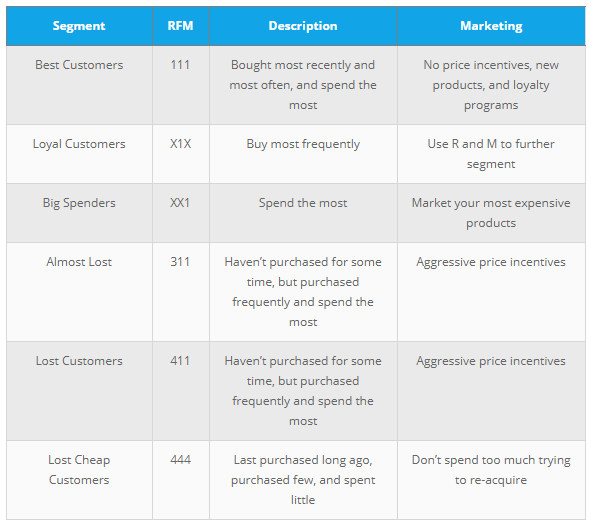

### Recency Scores

In [63]:
# create a dictionary with the recency quantiles
recency_dict = quantiles['recency'].to_dict()
recency_dict

{0.25: 18.0, 0.5: 53.0, 0.75: 136.0}

In [64]:
# create a function to calculate recency score
def recency_score(recency, recency_dict):
    if recency <= recency_dict[0.25]:
        # recency_score = 1 if recency is between 0-0.25 quantile
        return '1'
    elif recency <= recency_dict[0.5]:
        # recency_score = 2 if recency is between 0.25-0.5 quantile
        return '2'
    elif recency <= recency_dict[0.75]:
        # recency_score = 3 if recency is between 0.5-0.75 quantile
        return '3'
    else:
        # recency_score = 4 if recency is between 0.75-1 quantile
        return '4'

df_rfm['recency_score'] = df_rfm['recency'].apply(recency_score, args=(recency_dict,))
df_rfm.head()

,recency,frequency,monetary,recency_score
Customer ID,,,,
12346,165,11,372.86,4
12347,3,2,1323.32,1
12348,74,1,222.16,3
12349,43,3,2671.14,2
12351,11,1,300.93,1


### Frequency Score

In [65]:
# create a dictionary with the frequency quantiles
frequency_dict = quantiles['frequency'].to_dict()
frequency_dict

{0.25: 1.0, 0.5: 2.0, 0.75: 5.0}

In [66]:
# create a function to calculate frequency score
def frequency_score(frequency, frequency_dict):
    if frequency <= frequency_dict[0.25]:
        # frequency_score = 4 if frequency is between 0-0.25 quantile
        return '4'
    elif frequency <= frequency_dict[0.5]:
        # frequency_score = 3 if frequency is between 0.25-0.5 quantile
        return '3'
    elif frequency <= frequency_dict[0.75]:
        # frequency_score = 2 if frequency is between 0.5-0.75 quantile
        return '2'
    else:
        # frequency_score = 1 if frequency is between 0.75-1 quantile
        return '1'

df_rfm['frequency_score'] = df_rfm['frequency'].apply(frequency_score, args=(frequency_dict,))
df_rfm.head()

,recency,frequency,monetary,recency_score,frequency_score
Customer ID,,,,,
12346,165,11,372.86,4,1
12347,3,2,1323.32,1,3
12348,74,1,222.16,3,4
12349,43,3,2671.14,2,2
12351,11,1,300.93,1,4


In [67]:
# create a dictionary with the monetary quantiles
monetary_dict = quantiles['monetary'].to_dict()
monetary_dict

{0.25: 307.95, 0.5: 705.55, 0.75: 1722.8025}

In [68]:
# create a function to calculate monetary score
def monetary_score(monetary, monetary_dict):
    if monetary <= monetary_dict[0.25]:
        # monetary_score = 4 if monetary is between 0-0.25 quantile
        return '4'
    elif monetary <= monetary_dict[0.5]:
        # monetary_score = 3 if monetary is between 0.25-0.5 quantile
        return '3'
    elif monetary <= monetary_dict[0.75]:
        # monetary_score = 2 if monetary is between 0.5-0.75 quantile
        return '2'
    else:
        # monetary_score = 1 if monetary is between 0.75-1 quantile
        return '1'

df_rfm['monetary_score'] = df_rfm['monetary'].apply(monetary_score, args=(monetary_dict,))
df_rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
Customer ID,,,,,,
12346,165,11,372.86,4,1,3
12347,3,2,1323.32,1,3,2
12348,74,1,222.16,3,4,4
12349,43,3,2671.14,2,2,1
12351,11,1,300.93,1,4,4


In [69]:
# Concanetate the RFM scores
df_rfm['rfm_score'] = df_rfm['recency_score'] + df_rfm['frequency_score'] + df_rfm['monetary_score']
df_rfm.head(10)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
Customer ID,,,,,,,
12346,165,11,372.86,4,1,3,413
12347,3,2,1323.32,1,3,2,132
12348,74,1,222.16,3,4,4,344
12349,43,3,2671.14,2,2,1,221
12351,11,1,300.93,1,4,4,144
12352,11,2,343.80,1,3,3,133
12353,44,1,317.76,2,4,3,243
12355,203,1,488.21,4,4,3,443
12356,16,3,3562.25,1,2,1,121


The resulting table shows corresponding RFM scores for each customer. We can now analyze each segment and create personalized recommendations for each customer.

See the guide table below: 

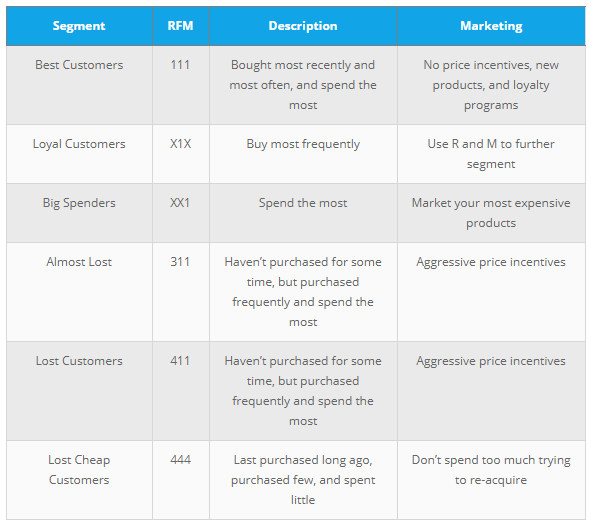

In [70]:
print("Best Customers")
len(df_rfm[df_rfm['rfm_score']=='111'])

Best Customers


441

In [71]:
# let's store the segment counts in a dictionary
segment_counts = {'best_customers (111)': len(df_rfm[df_rfm['rfm_score']=='111']),
                  'loyal_customers (X1X)': len(df_rfm[df_rfm['frequency_score']=='1']),
                  'big_spenders (XX1)': len(df_rfm[df_rfm['monetary_score']=='1']),
                  'almost_lost (311)': len(df_rfm[df_rfm['rfm_score']=='311']),
                  'lost_good_customers (411)': len(df_rfm[df_rfm['rfm_score']=='411']),
                  'lost_cheap_customers (444)': len(df_rfm[df_rfm['rfm_score']=='444'])}

In [72]:
# create a dataframe
df_counts = pd.DataFrame(segment_counts.values(), index=segment_counts.keys(), columns=['counts'])
df_counts

,counts
best_customers (111),441
loyal_customers (X1X),942
big_spenders (XX1),1079
almost_lost (311),98
lost_good_customers (411),16
lost_cheap_customers (444),463


Text(0, 0.5, '# Customers per Segment')

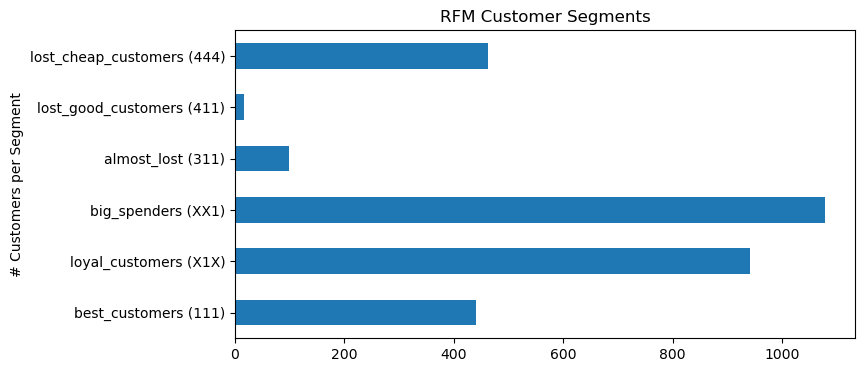

In [74]:
# plot the counts
fig, ax = plt.subplots(figsize=(8,4))
df_counts.plot(kind='barh', ax=ax, legend=False)
ax.set_title('RFM Customer Segments')
ax.set_ylabel('# Customers per Segment')

From the results, we can separate which customers are lost (no recent transactions) or which customers are consistently purchasing.

Note that the total counts of all these segments are not equal to the total counts of our customers. This is because we have some segments that are generic (big_spenders looking only at the monetary value, loyal_customers looking only at the frequency). Let's re-create the bar plot using the percentages to get a better picture of our customers.

In [75]:
# get percentages
customer_count = df['Customer ID'].nunique()

df_counts['pct'] = df_counts['counts']/customer_count
df_counts

,counts,pct
best_customers (111),441,0.102225
loyal_customers (X1X),942,0.218359
big_spenders (XX1),1079,0.250116
almost_lost (311),98,0.022717
lost_good_customers (411),16,0.003709
lost_cheap_customers (444),463,0.107325


Text(0.5, 0, '% Customers per Segment')

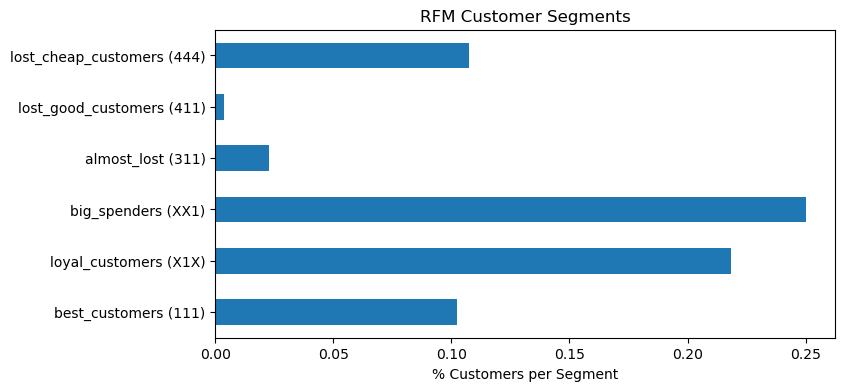

In [77]:
# plot the counts
fig, ax = plt.subplots(figsize=(8,4))
df_counts['pct'].plot(kind='barh', ax=ax, legend=False)
ax.set_title('RFM Customer Segments')
ax.set_xlabel('% Customers per Segment')

With these percentages, we see that around 11% of the customer base (lost_cheap_customers + lost_good_customers) are lost. Most of which are the infrequent and low value customers.

On the opposite end, our best customers (recent, high frequency, and high value) also takes 10% of the total.

In [78]:
df_rfm[df_rfm['rfm_score']=='111'].sort_values('monetary', ascending=False).head(10)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
Customer ID,,,,,,,
18102,1,89,349164.35,1,1,1,111
14646,10,78,248396.50,1,1,1,111
14156,7,102,196566.74,1,1,1,111
14911,1,205,152147.57,1,1,1,111
13694,9,94,131443.19,1,1,1,111
17511,3,31,84541.17,1,1,1,111
15061,3,86,83284.38,1,1,1,111
16684,15,27,80489.21,1,1,1,111
16754,8,29,65500.07,1,1,1,111


# Conclusion and Recommendation

Using pandas and matplotlib functions, we were able to perform RFM segmentation with our customers. With this results, we can provide personalized marketing campaigns for each customer.

We were able to segment the customers based on their purchasing habits. From this segments, we can provide personalized marketing campaigns. For example, by identifying the almost_lost customers, we can send them larger discount vouchers to get them to re-purchase. For the top_spenders and best_customers, we can show them the more expensive products or provide loyalty rewards to keep them happy and satisfied.

We also established percentages and distributions of the customer segments. We can set them as a metric to target for our operations. When we see that the lost customers percentage is increasing from 10%, we would get the need to create campaigns to improve retention.

This concludes our RFM analysis with python. Recall that cleaning and performing exploratory analysis is a key procedure that allows us to improve our understanding of our dataset. By creating customer segments based on similar attributes (cohorts, rfm, etc.), we can provide actionable insights for our stakeholders.